<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# <b>Applied Data Science Capstone:  Extra Web Scraping for Space Launch Info </b>

### Stephane Dedieu, June 1st 2022. 

In this Notebook we collect more data, relative to space launch competition and pricing per kg, for completing the final report. 

https://en.wikipedia.org/wiki/Space_launch_market_competition

In [1]:
!pip install bs4
!pip install lxml
!pip install html5lib
# !pip install requests==2.26.0

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Estimated time needed: **30** minutes


## Objectives


After completing this lab you will be able to:


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
            <ul>
                <li>Web scraping</li>
                <li>Downloading Space Launch Competition Table</li>
                <li>Downloading Payload Cost Table</li>
            </ul>
    </ul>
    
        

</div>

<hr>


## Web scraping

In [4]:
# Create an URL object
url1 = 'https://en.wikipedia.org/wiki/Space_launch_market_competition'# Create object page
page = requests.get(url1)

In [5]:
#url1=url1.replace('\n' , ' ')

In [6]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Space launch market competition - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"642fdee8-9315-4843-8f72-9f93d1ad9ce0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Space_launch_market_competition","wgTitle":"Space launch market competition","wgCurRevisionId":1085149187,"wgRevisionId":1085149187,"wgArticleId":43450436,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","CS1 errors: missing title","CS1 errors: bare URL","Al

We are interested in Launch Market. There is only one 'table',{'class':'wikitable sortable'}

List all tables in page

In [7]:
all_tables = soup.find_all("table", attrs={"class": "wikitable"})
print("Number of tables on site: ",len(all_tables))

Number of tables on site:  2


## Downloading Space Launch Competition Table

In [8]:
Table_Competition = soup.find_all('table')[0]
Table_Competition

<table class="wikitable sortable" style="text-align:center;">
<caption>Launch market<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (October 2017)">citation needed</span></a></i>]</sup>
</caption>
<tbody><tr>
<th colspan="2">Rocket
</th>
<th style="text-align:left">Origin
</th>
<th data-sort-type="date">First launch
</th>
<th>2010</th>
<th>2011</th>
<th>2012</th>
<th>2013</th>
<th>2014</th>
<th>2015</th>
<th>2016</th>
<th>2017</th>
<th>2018</th>
<th>2019</th>
<th>2020</th>
<th>2021
</th></tr>
<tr>
<th style="background:MediumBlue;">
</th>
<th><a href="/wiki/Ariane_5" title="Ariane 5">Ariane 5</a>
</th>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/23px-Fla

In [9]:
headers = []
for i in Table_Competition.find_all("th"):
 title = i.text
 headers.append(title)
headers

['Rocket\n',
 'Origin\n',
 'First launch\n',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021\n',
 '\n',
 'Ariane 5\n',
 '\n',
 'Proton-M\n',
 '\n',
 'Soyuz-2\n',
 '\n',
 'PSLV\n',
 '\n',
 'Falcon 9 / Falcon Heavy\n',
 '\n',
 'Electron\n',
 '\n',
 'Vega\n',
 '\n',
 'Kuaizhou 1A\n',
 '\n',
 'Others[d]\n',
 'Total market',
 '29',
 '32',
 '34',
 '31',
 '37',
 '41',
 '37',
 '41',
 '44',
 '44',
 '50',
 '62\n']

In [10]:
new_header = []
for string in headers:
    new_string = string.replace("\n", "")
    new_header.append(new_string)
print(new_header)

['Rocket', 'Origin', 'First launch', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '', 'Ariane 5', '', 'Proton-M', '', 'Soyuz-2', '', 'PSLV', '', 'Falcon 9 / Falcon Heavy', '', 'Electron', '', 'Vega', '', 'Kuaizhou 1A', '', 'Others[d]', 'Total market', '29', '32', '34', '31', '37', '41', '37', '41', '44', '44', '50', '62']


#### For any reason the content of one column, the Rockets, shows up in the headers. We will create a 'rocket' column based from the header.   <br>     We keep only 15 columns.  [0:15]

In [11]:
head15= new_header[0:15]
head15

['Rocket',
 'Origin',
 'First launch',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [12]:
df = pd.DataFrame(columns = head15)
df


,Rocket,Origin,First launch,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


#### Getting rid of  "\n"

In [13]:
#Data_Competition= Data_Competition[headers[0:15]].replace('\n',' ')
Data_Competition=df
Data_Competition.replace("\n","")
#Data_Competition[headers[0:15]].columns.str.replace('\n', '',regex=True)
Data_Competition
print(Data_Competition)

Empty DataFrame
Columns: [Rocket, Origin, First launch, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []


In [14]:
#Data_Competition.set_index(headers[0],inplace=True)
#Data_Competition

In [15]:
table_rows=Table_Competition.find_all('tr')
table_rows

[<tr>
 <th colspan="2">Rocket
 </th>
 <th style="text-align:left">Origin
 </th>
 <th data-sort-type="date">First launch
 </th>
 <th>2010</th>
 <th>2011</th>
 <th>2012</th>
 <th>2013</th>
 <th>2014</th>
 <th>2015</th>
 <th>2016</th>
 <th>2017</th>
 <th>2018</th>
 <th>2019</th>
 <th>2020</th>
 <th>2021
 </th></tr>,
 <tr>
 <th style="background:MediumBlue;">
 </th>
 <th><a href="/wiki/Ariane_5" title="Ariane 5">Ariane 5</a>
 </th>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/23px-Flag_of_Europe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/35px-Flag_of_Europe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/45px-Flag_of_Europe.svg.png 2x" width="23"/> </span><a href="/wiki/Europe" title="Europe">Europe</a>
 </td>
 <td>1996
 </td>
 <td>12</td>
 <td>8<

We fill the dataframe

In [16]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
row 1
colunm 0 cell <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/23px-Flag_of_Europe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/35px-Flag_of_Europe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/45px-Flag_of_Europe.svg.png 2x" width="23"/> </span><a href="/wiki/Europe" title="Europe">Europe</a>
</td>
colunm 1 cell <td>1996
</td>
colunm 2 cell <td>12</td>
colunm 3 cell <td>8</td>
colunm 4 cell <td>12</td>
colunm 5 cell <td>6</td>
colunm 6 cell <td>10</td>
colunm 7 cell <td>12</td>
colunm 8 cell <td>10</td>
colunm 9 cell <td>10</td>
colunm 10 cell <td>9</td>
colunm 11 cell <td>8</td>
colunm 12 cell <td>7</td>
colunm 13 cell <td>3
</td>
row 2
colunm 0 cell <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" dat

In [17]:
head14= new_header[0:14]

In [18]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    row = [w.replace("\n", "")  for w in row]
    row = [w.replace("[a]", "")  for w in row]
    l.append(row)
Data_Competition=pd.DataFrame(l, columns= head14)
Data_Competition
Data_Competition= Data_Competition.drop([0,6,7,8,9,10])
Data_Competition

,Rocket,Origin,First launch,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Europe,1996,12,8,12,6,10,12,10,10,9,8,7,3
2,Russia,2001,8,7,11,8,8,7,3,3,0,3,1,2
3,Russia,2006,1,5,4,5,8,6,5,5,5,6,4,9
4,India,2007,1,2,2,2,1,3,3,2,3,3,1,1
5,United States,2010,0,0,0,2,4,5,8,12,16,11,26,31


The process could not extract rockets. 

In [19]:
rocket_column_values = ['Ariane 5','Proton-M','Soyuz-2','PSLV','Falcon 9 / Falcon Heavy']
Data_Competition.insert(0, "new rocket column", rocket_column_values, True)
Data_Competition.columns = head15
Data_Competition

,Rocket,Origin,First launch,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Ariane 5,Europe,1996,12,8,12,6,10,12,10,10,9,8,7,3
2,Proton-M,Russia,2001,8,7,11,8,8,7,3,3,0,3,1,2
3,Soyuz-2,Russia,2006,1,5,4,5,8,6,5,5,5,6,4,9
4,PSLV,India,2007,1,2,2,2,1,3,3,2,3,3,1,1
5,Falcon 9 / Falcon Heavy,United States,2010,0,0,0,2,4,5,8,12,16,11,26,31


In [20]:
blankIndex=[''] * len(Data_Competition)
Data_Competition.index=blankIndex
#Data_Competition.style.set_caption("Space launch market competition")
#Data_Competition.style.set_table_attributes("style='display:inline'").set_caption('Caption table')
#Data_Competition

#styles = [dict(selector="caption",
#            props=[("text-align", "right"),
#                   ("font-size", "150%"),
#                   ("color", 'lime')])]
#Data_Competition.style.set_caption('Members').set_table_styles(styles)


Data_Competition.style.set_caption("Space launch market competition").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '14px'),
        ('font-weight', 'bold')
    ] 
}])

,Rocket,Origin,First launch,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
,Ariane 5,Europe,1996,12,8,12,6,10,12,10,10,9,8,7,3
,Proton-M,Russia,2001,8,7,11,8,8,7,3,3,0,3,1,2
,Soyuz-2,Russia,2006,1,5,4,5,8,6,5,5,5,6,4,9
,PSLV,India,2007,1,2,2,2,1,3,3,2,3,3,1,1
,Falcon 9 / Falcon Heavy,United States,2010,0,0,0,2,4,5,8,12,16,11,26,31


#### For plotting launch numbers we drop 2 columns 


In [21]:
# Drop the label 'Locations'
Data_Competition_red=Data_Competition.drop(labels=['Origin','First launch'], axis=1)
Data_Competition_red

,Rocket,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
,Ariane 5,12,8,12,6,10,12,10,10,9,8,7,3
,Proton-M,8,7,11,8,8,7,3,3,0,3,1,2
,Soyuz-2,1,5,4,5,8,6,5,5,5,6,4,9
,PSLV,1,2,2,2,1,3,3,2,3,3,1,1
,Falcon 9 / Falcon Heavy,0,0,0,2,4,5,8,12,16,11,26,31


In [22]:
Data_Competition_red.set_index(head15[0],inplace=True)
Data_Competition_red

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Rocket,,,,,,,,,,,,
Ariane 5,12,8,12,6,10,12,10,10,9,8,7,3
Proton-M,8,7,11,8,8,7,3,3,0,3,1,2
Soyuz-2,1,5,4,5,8,6,5,5,5,6,4,9
PSLV,1,2,2,2,1,3,3,2,3,3,1,1
Falcon 9 / Falcon Heavy,0,0,0,2,4,5,8,12,16,11,26,31


In [23]:
Data_Competition_T=Data_Competition_red.transpose()
Data_Competition_T

Rocket,Ariane 5,Proton-M,Soyuz-2,PSLV,Falcon 9 / Falcon Heavy
2010,12,8,1,1,0
2011,8,7,5,2,0
2012,12,11,4,2,0
2013,6,8,5,2,2
2014,10,8,8,1,4
2015,12,7,6,3,5
2016,10,3,5,3,8
2017,10,3,5,2,12
2018,9,0,5,3,16
2019,8,3,6,3,11


In [24]:
Data_Competition_T.dtypes
Data_Competition_T.apply(pd.to_numeric).info()
Data_Competition_T=Data_Competition_T.apply(pd.to_numeric)

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2021
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Ariane 5                 12 non-null     int64
 1   Proton-M                 12 non-null     int64
 2   Soyuz-2                  12 non-null     int64
 3   PSLV                     12 non-null     int64
 4   Falcon 9 / Falcon Heavy  12 non-null     int64
dtypes: int64(5)
memory usage: 876.0+ bytes


Empty DataFrame
Columns: [Ariane 5, Proton-M, Soyuz-2, PSLV, Falcon 9 / Falcon Heavy]
Index: []


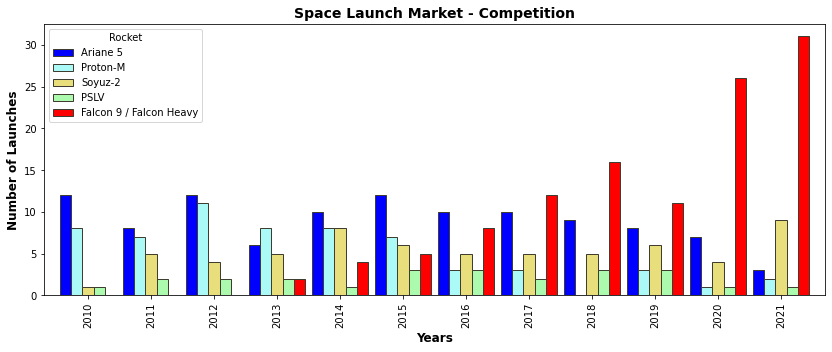

In [25]:
#ax = Data_Competition_T.plot(y='Ariane 5', kind="bar")
#ax = Data_Competition_T.plot(y='Falcon 9 / Falcon Heavy', kind="bar")
print(Data_Competition_T.head(0))
#ax = Data_Competition_T.plot(y=['Ariane 5', 'Falcon 9 / Falcon Heavy'], kind="bar")
#figure(figsize=(8, 6), dpi=80)
bars_colors=['b','#ABFAF7','#E8DE7B','#ABFAAE','r']

ax = Data_Competition_T.plot(y=['Ariane 5', 'Proton-M', 'Soyuz-2', 'PSLV', 'Falcon 9 / Falcon Heavy'], 
                             kind="bar", 
                             width=0.9,
                             color=bars_colors,
                             edgecolor='#3E3D2F',
                             figsize=(14,5))
#ax.plot(figsize=(8,8));
ax.set_xlabel('Years', fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Launches", fontsize=12, fontweight='bold')
ax.set_title("Space Launch Market - Competition", fontsize=14, fontweight='bold')
plt.savefig('Space_Launch_Competition_BarPlot.png')
plt.show()

## Downloading Payload Cost Table

In [26]:
Table_Payload_Cost = soup.find_all('table')[2]
#====
#Table_Payload_Cost

In [27]:
# Obtain every title of columns with tag <th>
headers = []
for i in Table_Payload_Cost.find_all("th"):
 title = i.text
 headers.append(title)
headers

['Launch Vehicle', 'Payload cost per kg\n']

In [28]:
headers[1] = "Payload cost per kg ($)"

In [29]:
headers

['Launch Vehicle', 'Payload cost per kg ($)']

In [30]:
Data_PayLoad_Cost = pd.DataFrame(columns = headers)

In [31]:
#listTd=Table_Payload_Cost.findAll("td")
#print(listTd)

In [32]:
#len(Data_PayLoad_Cost)

In [33]:
# Create a for loop to fill Data
#for j in Table_Payload_Cost.find_all("tr")[1:]:
#for j in Table_Payload_Cost.find_all("tr"):
#     print(j)
#     row_data = j.find_all("td")
#     row = [i.text for i in row_data]
#     #row[1]=row[1].replace("\n", " ")   
#     length = len(Data_PayLoad_Cost)
#Data_PayLoad_Cost.loc[length] = row
#Data_PayLoad_Cost.append = row
#j
#row_data

In [34]:
table_rows=Table_Payload_Cost.find_all('tr')
table_rows

[<tr>
 <th>Launch Vehicle</th>
 <th>Payload cost per kg
 </th></tr>,
 <tr>
 <td><a href="/wiki/Vanguard_(rocket)" title="Vanguard (rocket)">Vanguard</a></td>
 <td>$1,000,000 <sup class="reference" id="cite_ref-Trends_23-0"><a href="#cite_note-Trends-23">[19]</a></sup>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Space_Shuttle" title="Space Shuttle">Space Shuttle</a></td>
 <td>$54,500 <sup class="reference" id="cite_ref-Trends_23-1"><a href="#cite_note-Trends-23">[19]</a></sup>
 </td></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/Electron_(rocket)" title="Electron (rocket)">Electron</a></td>
 <td>$19,039 <sup class="reference" id="cite_ref-24"><a href="#cite_note-24">[20]</a></sup><sup class="reference" id="cite_ref-25"><a href="#cite_note-25">[21]</a></sup>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Ariane_5" title="Ariane 5">Ariane 5G</a></td>
 <td>$9,167 <sup class="reference" id="cite_ref-Trends_23-2"><a href="#cite_note-Trends-23">[19]</a></sup>
 </td></tr>,
 <tr>
 <td><a href="/wiki/L

In [35]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
row 1
colunm 0 cell <td><a href="/wiki/Vanguard_(rocket)" title="Vanguard (rocket)">Vanguard</a></td>
colunm 1 cell <td>$1,000,000 <sup class="reference" id="cite_ref-Trends_23-0"><a href="#cite_note-Trends-23">[19]</a></sup>
</td>
row 2
colunm 0 cell <td><a href="/wiki/Space_Shuttle" title="Space Shuttle">Space Shuttle</a></td>
colunm 1 cell <td>$54,500 <sup class="reference" id="cite_ref-Trends_23-1"><a href="#cite_note-Trends-23">[19]</a></sup>
</td>
row 3
colunm 0 cell <td><a class="mw-redirect" href="/wiki/Electron_(rocket)" title="Electron (rocket)">Electron</a></td>
colunm 1 cell <td>$19,039 <sup class="reference" id="cite_ref-24"><a href="#cite_note-24">[20]</a></sup><sup class="reference" id="cite_ref-25"><a href="#cite_note-25">[21]</a></sup>
</td>
row 4
colunm 0 cell <td><a href="/wiki/Ariane_5" title="Ariane 5">Ariane 5G</a></td>
colunm 1 cell <td>$9,167 <sup class="reference" id="cite_ref-Trends_23-2"><a href="#cite_note-Trends-23">[19]</a></sup>
</td>
row 5
colunm 0

In [36]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    #row=row.replace("[19]" "[22]" "[20][21]" "\n", " ")  
    row = [w.replace("\n", " ")  for w in row]
    row = [w.replace("[19]", " ")  for w in row]
    row = [w.replace("[20][21]", " ")  for w in row]
    row = [w.replace("[22]", " ")  for w in row]
    row = [w.replace("$", " ")  for w in row]
    l.append(row)
Data_PayLoad_Cost=pd.DataFrame(l, columns=['Launch Vehicle', 'Payload cost per kg ($)'])
Data_PayLoad_Cost
Data_PayLoad_Cost = Data_PayLoad_Cost.drop(0)
Data_PayLoad_Cost = Data_PayLoad_Cost.drop(1)
Data_PayLoad_Cost

,Launch Vehicle,Payload cost per kg ($)
2,Space Shuttle,"54,500"
3,Electron,"19,039"
4,Ariane 5G,"9,167"
5,Long March 3B,"4,412"
6,Proton,"4,320"
7,Falcon 9,"2,720"
8,Falcon Heavy,"1,400"


In [37]:
Data_PayLoad_Cost.dtypes
Data_PayLoad_Cost = Data_PayLoad_Cost.replace(',', '', regex=True)
Data_PayLoad_Cost = Data_PayLoad_Cost.astype({"Payload cost per kg ($)": float}, errors='raise') 
Data_PayLoad_Cost = Data_PayLoad_Cost.astype({"Launch Vehicle": str}, errors='raise') 
Data_PayLoad_Cost.reset_index(drop=True, inplace=True)
Data_PayLoad_Cost

,Launch Vehicle,Payload cost per kg ($)
0,Space Shuttle,54500.0
1,Electron,19039.0
2,Ariane 5G,9167.0
3,Long March 3B,4412.0
4,Proton,4320.0
5,Falcon 9,2720.0
6,Falcon Heavy,1400.0


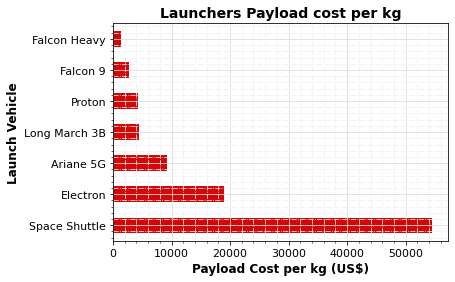

In [38]:
from matplotlib import pyplot as plt

Data_PayLoad_Cost.plot(x="Launch Vehicle", y="Payload cost per kg ($)", kind="barh", fontsize=11, color = '#D30707',legend=None ) #'r')
plt.grid(b=True, which='major', color='#DDDDDD', linestyle='-')
plt.grid(b=True, which='minor', color='#EEEEEE', linestyle='-.')
plt.minorticks_on()

#plt.grid(True, color = "grey", linewidth = "0.5", linestyle = "-.")
#plt.legend(prop={'size':12, 'weight':'bold'})
#plt.get_legend().remove()
plt.title('Launchers Payload cost per kg', fontsize=14, fontweight='bold')
plt.ylabel('Launch Vehicle', fontsize=12, fontweight='bold')
plt.xlabel('Payload Cost per kg (US$)', fontsize=12, fontweight='bold')
plt.savefig('Payload_cost.png')


#### Build a dataframe  Arianespace v. SpaceX


In [39]:
# assign data of lists.  
data = {'Launcher': ['Ariane 5', 'Ariane 6 (64)', 'Falcon9 / Falcon9 Heavy', 'Starship'], 
        'Height': [20, 21, 19, 18],
        'Weight': [20, 21, 19, 18],
        'Payload LEO (kg)': [6600, 21600 , '22800 / 63800', '100k'],
        'Payload GTO-GEO (kg)': ['>10000', '>11500' , 8300 , 22000],
        'Mission to Mars': ['no', 'yes', 'yes', 'yes']
       }  
  
# Create DataFrame  
df = pd.DataFrame(data)  
blankIndex=[''] * len(df)
df.index=blankIndex
#df
df.set_index('Launcher',inplace=True)
df

,Height,Weight,Payload LEO (kg),Payload GTO-GEO (kg),Mission to Mars
Launcher,,,,,
Ariane 5,20,20,6600,>10000,no
Ariane 6 (64),21,21,21600,>11500,yes
Falcon9 / Falcon9 Heavy,19,19,22800 / 63800,8300,yes
Starship,18,18,100k,22000,yes


In [40]:
#!pip install dataframe_image

In [41]:
import pandas
import dataframe_image as dfi

dfi.export(df,"mytable_2.png")


In [52]:
#import pandas
#import dataframe_image as dfi
#from pandas import pandas.plotting.table # EDIT: see deprecation warnings below
#ax = plt.subplot(111, frame_on=False) # no visible frame
#ax = plt.plot(figsize(5,6)) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis

#pandas.plotting.table(ax, df)  # where df is your data frame

#plt.savefig('mytable.png')
#plt.show()

Ariane-5 Launches success rate, since 1995. Source Wikipedia.  https://fr.wikipedia.org/wiki/Ariane_5
After editing histogram: []  We will build the dataframe by hand 

In [43]:
import numpy as np

#=== Launch outcomes ===
#{{ #invoke,Chart | bar chart
X = [1996,1997,1998,1999, 2000 ,2001,2002,2003, 2004 ,2005,2006,2007,2008,2009,
      2010,2011, 2012 ,2013,2014,2015,2016,2017,2018,2019,2020, 2021]
fail = [1,  0,  0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
semi_fail = [0 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0]
success = [0 , 0 , 1 , 1 , 4 , 1 , 3 , 3 , 3 , 5 , 5 , 6 , 6 , 7 , 6 , 5 , 7 , 4 , 6 , 6 , 7 , 6 , 5 , 4 , 3 , 3]
    
    
    
    
fail_v = np.array(fail)    
semi_fail_v=np.array(semi_fail) 
success_v=np.array(success)


#    | colors = FireBrick , Orange , ForestGreen
#| group names = Failure , Partial failure , Success
##| units suffix = _flights
#| x legends = 1996 ,,,, 2000 ,,,, 2004 ,,,, 2008 ,,,, 2012 ,,,, 2016 ,,,, 2020 ,
#}}

#{{column}}
#{{columns-end}}

In [44]:
total_launches=fail_v+semi_fail_v+success_v
success_rate= success_v/total_launches 

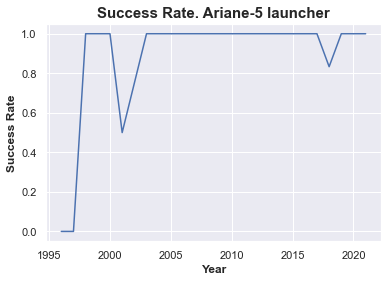

In [58]:

import seaborn as sns
from matplotlib import pyplot as plt



sns.set(font_scale = 1) #  for harmonizing plots... with Flacon 9 ! 
#sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s=10,
 #              alpha=0.5, linewidth=3, height=6, aspect=3)

#plt.plot(X,fail)#
#plt.grid(b=True, which='major', color='#DDDDDD', linestyle='-')
#plt.grid(b=True, which='minor', color='#EEEEEE', linestyle='-.')
plt.minorticks_on()
#plt.plot(X,success)
plt.xlabel("Year",fontsize=12, fontweight='bold')
plt.ylabel("Success Rate",fontsize=12, fontweight='bold')
#plt.plot(X,total_launches)
plt.title("Success Rate. Ariane-5 launcher", fontsize=15, fontweight='bold')


plt.plot(X,success_rate)
